In [1]:
from tqdm import tqdm
import random
import pandas as pd
import numpy as np
import seaborn as sns
import unidecode
import re

from generate_dataset import *

In [2]:
data_file = 'data/data_27topics_processed.txt'
language = 'vi'
with open(data_file, 'r') as file:
    reader = file.readlines()

In [3]:
len(reader)

359993

In [4]:
list_len = []
sentences = []
for line in reader:
    if len(line.split()) in range(5, 45):
        sentences.append(line)
        list_len.append(line.split().__len__())

In [5]:
len(list_len)

302398

In [6]:
df = pd.DataFrame(list_len, columns=['len'])
df.head()

,len
0,34
1,20
2,39
3,21
4,24


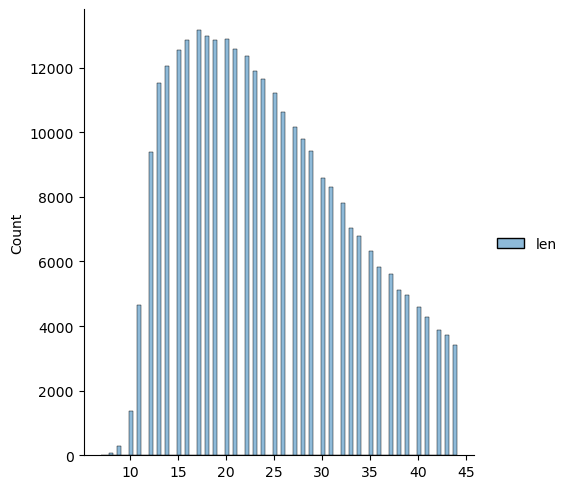

In [7]:
sns.displot(df)

In [8]:
import re
text = "Hồng Ngọc: Theo quy luật,... nhóm sẽ tan, mỗi người sẽ đi theo hướng riêng của mình."
re.findall(r'\w+|[^\w\s]', text)

['Hồng',
 'Ngọc',
 ':',
 'Theo',
 'quy',
 'luật',
 ',',
 '.',
 '.',
 '.',
 'nhóm',
 'sẽ',
 'tan',
 ',',
 'mỗi',
 'người',
 'sẽ',
 'đi',
 'theo',
 'hướng',
 'riêng',
 'của',
 'mình',
 '.']

In [11]:
data = {
    'sentence': [],
    'label': []
}

for line in tqdm(sentences):
    line = line.rstrip('\n').rstrip()
    tokens = re.findall(r'\w+|[^\w\s]', line) # Tách dấu câu ra
    line = " ".join(tokens)

    if '. ' in line:
        continue
    '''
    mỗi từ có xác suất: 
        remove_random_space 0.025
        remove_random_accent 0.025
        replace_accent_chars 0.025
        lower_case_words = 0.025
    mỗi chữ cái có xác suất:
        swap_characters_case 0.01
        delete_characters 0.01
        insert_characters 0.01
        replace_characters 0.01
    '''

    idx = list()
    w_functions = [remove_random_space, remove_random_accent, replace_accent_chars, lower_case_words]
    c_functions = [swap_characters_case, delete_characters, insert_characters, replace_characters]
    for func in w_functions:
        line, _ = func(line, 0.025) 
        idx.extend(_)
    
    for func in c_functions:
        line, _ = func(line, 0.01) 
        idx.extend(_)
    
    mask = []
    for i in range(len(line.split())):
        mask.append(int(i in idx))
    
    data['sentence'].append(line)

    label = [str(i) for i in mask]
    label = ''.join(label)
    data['label'].append(label)

    if len(data['sentence']) == 250000:
        break

 97%|█████████▋| 291834/302398 [05:23<00:11, 901.73it/s] 


In [12]:
assert data['sentence'].__len__() == data['label'].__len__()

In [13]:
df_data = pd.DataFrame(data)
df_data.tail(10)

,sentence,label
249990,Sự phức tạp thích hợp vớicác nhà biệt thựhoặc ...,0000010011000
249991,"TNrận đấu kết thúc sau 65 phúT , với 28 lỗi tự...",100000100000010001101010
249992,Nếu CAssano quyết định rời sân Olimpico thì qn...,01000000110000000000000
249993,"Tất cả các đôi nam nữ , kể cả khi họ đã là vợ ...",000000000000000001011010
249994,Loại mÁy dùng trong gia đình bán chạy nhat là ...,01000000100000100000000110011000100000000
249995,ChelsKea hành động như vậy cũng là để thể iện ...,10000000010000100110000010110
249996,Đơn vị giao dỉch là 100 cổ phiếu hoặc hoặc 10 ...,00010000000000000000
249997,Quyết định trên của đội bóng thanh London được...,00000010000000
249998,"Trong khi đò , Brussels cũng Nói rằng họ có tr...",00100010001100000000
249999,Có những mẩu quản cáo mang ý nghĩa giáo dục rấ...,0001000000000110010000000


In [14]:
df_data.to_csv('data/data250k.csv', index=False)